In [29]:
# Implicit-Modified Euler, Trapezoidal 

The explicit Euler formula is called “explicit” because it only requires information at tj to compute
the state at tj +1 . That is, S(tj +1 ) can be written explicitly in terms of values we have (i.e., tj and S(tj )).
The Implicit Euler Formula can be derived by taking the linear approximation of S(t) around tj +1
and computing it at tj::

S(tj +1 ) = S(tj ) + hF (tj +1 , S(tj +1 ))

This formula is peculiar because it requires that we know S(tj +1 ) in order to compute S(tj +1 )!
However, it happens that sometimes we can use this formula to approximate the solution to initial
value problems. Before we provide details on how to solve these problems using the implicit Euler
formula, we introduce another implicit formula called the Trapezoidal Formula, which is the average
of the explicit and implicit Euler formulas::

S(tj +1 ) = S(tj ) + h/2[F (tj , S(tj )) + F (tj +1 , S(tj +1 ))]

TRY IT! Use the explicit and implicit Euler, as well as trapezoidal, formulas to solve the pen-
dulum equation over the time interval [0, 5] in increments of 0.1, and for an initial solution of S0 = column( [1 0] ). For the model parameters using (g/l)^(0.5) = 4, plot the approximate solution on a single
graph.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [3]:
plt.style.use("seaborn-poster")
%matplotlib inline

In [16]:
h = 0.1

# numerical grid
t = np.arange(0, 5.1, h)

# oscillation freq of pendulum
w = 4

s0 = np.array([[1], [0]])   # column vector of initial condition

# RHS matrix for explicit form of expression 
m_e = np.array([[1, h], [-w**2*h, 1]])

# RHS matrix for the implcit form of expression
m_i = inv(np.array([[1, -h/2], [w**2*h, 1]]))

# RHS matrix for the trapezoidal form
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2, 1]])), np.array([[1, h/2], [-w**2*h/2, 1]]))

In [17]:
# defining position vector with zero array elements with certain dimensionality
# explicit
s_e = np.zeros((len(t), 2))
print(len(t))
# implicit
s_i = np.zeros((len(t), 2))
# trapezoidal
s_t = np.zeros((len(t), 2))

51


In [18]:
# transposing the initial column vector as row vector ajnd storing in the respective matrices 
print(s0)
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

[[1]
 [0]]


In [20]:
# let's evolve the LHS position vector according to the RHS pendulum based equation

for j in range(0, len(t) -1):
    s_e [j+1, :] = np.dot(m_e, s_e[j, :])
    s_i [j+1, :] = np.dot(m_i, s_i[j, :])
    s_t [j+1, :] = np.dot(m_t, s_t[j, :])

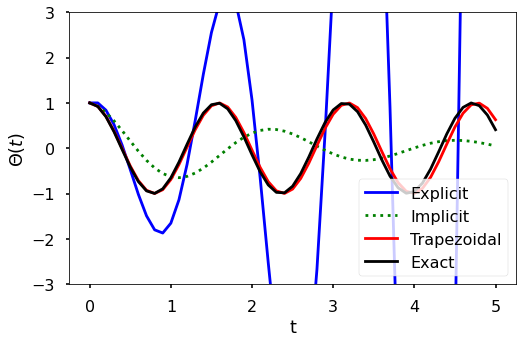

In [30]:
plt.figure(figsize = (8,5))
plt.plot(t, s_e[:, 0], "b-")
plt.plot(t, s_i[:, 0], "g:")
plt.plot(t, s_t[:, 0], "r-")
plt.plot(t, np.cos(w*t), "k")
plt.ylim(-3,3)
plt.xlabel("t")
plt.ylabel ("$\Theta (t)$")
plt.legend(["Explicit", "Implicit", "Trapezoidal", "Exact"])

# As we can see that trapezoidal gives the best performance